# Raw Data Exploration:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fmin_l_bfgs_b
from datetime import datetime, timedelta
from itertools import product

In [2]:
data = pd.read_csv('data/2013_Events.csv')
data.columns

Index(['ID', 'Event start date', 'One day?', 'Event end date',
       'Day of the week', 'Action type', 'Action', 'Actor-structure',
       'Actor-form', 'Actor-ideology', 'Actor specified', 'Target addressee',
       'Target criticized', 'Target-structure', 'Target-form',
       'Target-ideology', 'Target specified', 'Event', 'Event series',
       'Pavlichenko', 'Oblast', 'Location', 'Time', 'Issue 1', 'Issue 2',
       'Issue 3', 'Public transportation', 'Number of protesters',
       'Number of civilians arrested', 'Number of civilians injured',
       'Number of civilians killed', 'Property damage',
       'State forces involved in the conflict',
       'Number of state forces injured', 'Number of state forces killed',
       'Dubious event'],
      dtype='object')

In [3]:
data = data.loc[data['Event start date'] < '2013-11-21']
data.groupby(['Action type']).size()

Action type
negative response    1065
other repression      376
positive response     244
protest              4902
dtype: int64

## Number of protest before November 21st 2013:

In [4]:
# Read in the data 
data = pd.read_csv('data/2013_Events.csv')
#remove entries older than 2013/11/16 and after 2014-02-25
data = data[['Event start date','Event end date', 'Number of protesters', 'Oblast']]
data['Event start date'] = pd.to_datetime(data['Event start date'])
data['Event end date'] = pd.to_datetime(data['Event end date'])
# data = data.loc[data['Event start date'] > '2013-11-20']
# data = data.loc[data['Event end date'] < '2014-02-25']
data = data.sort_values(by = 'Event start date')
data = data.fillna(0)
data = data[~data.Oblast.isin(['Chernihiv',
                               'Donetsk',
                               'Dnipropetrovsk',
                               'Kharkiv',
                               'Kherson',
                               'Kirovohrad',
                               'Poltava',
                               'Sumy',
                               'Zhytomyr'
                                ])]
oblasts = data['Oblast'].unique()
oblasts
begin_date = "2013-01-01 00:00"
period = 370

distributed_data = pd.DataFrame({'event_date':[], 'day':[], 'Number of protesters':[], 'Number of events': [], 'oblast': []})

for ob in oblasts:
    # print(ob)
    distributed_data_ob = pd.DataFrame( {'event_date': pd.date_range(begin_date, periods=period), 
                                            'day': [i for i in range(0, period)], 
                                            'Number of protesters': [0 for i in range(0, period)], 
                                            'Number of events': [0 for i in range(0, period)],
                                            'oblast': [ob for i in range(0, period)]
                                        })
    
    start_day_list =  data.loc[data['Oblast'] == ob]['Event start date'].tolist()
    end_day_list = data.loc[data['Oblast'] == ob]['Event end date'].tolist()
    prot_num = data.loc[data['Oblast'] == ob]['Number of protesters'].tolist()

    for i in range(0, len(start_day_list)):
        if type(start_day_list[i])!=int and type(end_day_list[i])!=int:

            diff = end_day_list[i] - start_day_list[i]   
            if diff == timedelta(0):
                distributed_data_ob.loc[(distributed_data_ob.event_date== start_day_list[i]), 'Number of protesters'] = distributed_data_ob.loc[(distributed_data_ob.event_date== start_day_list[i]), 'Number of protesters'] + prot_num[i]
                distributed_data_ob.loc[(distributed_data_ob.event_date== start_day_list[i]), 'Number of events'] = distributed_data_ob.loc[(distributed_data_ob.event_date== start_day_list[i]), 'Number of events'] + 1
            else:
                for j in range(0, diff.days+1):
                    distributed_data_ob.loc[(distributed_data_ob.event_date== start_day_list[i] + timedelta(j)), 'Number of protesters'] = distributed_data_ob.loc[(distributed_data_ob.event_date== start_day_list[i] + timedelta(j)), 'Number of protesters'] + prot_num[i]
                    distributed_data_ob.loc[(distributed_data_ob.event_date== start_day_list[i] + timedelta(j)), 'Number of events'] = distributed_data_ob.loc[(distributed_data_ob.event_date== start_day_list[i] + timedelta(j)), 'Number of events'] + 1
       
                
    distributed_data = distributed_data.append(distributed_data_ob, ignore_index=True)

distributed_data
    

C:\Users\yassin\AppData\Local\Temp\ipykernel_10788\1676080481.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distributed_data = distributed_data.append(distributed_data_ob, ignore_index=True)
C:\Users\yassin\AppData\Local\Temp\ipykernel_10788\1676080481.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distributed_data = distributed_data.append(distributed_data_ob, ignore_index=True)
C:\Users\yassin\AppData\Local\Temp\ipykernel_10788\1676080481.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distributed_data = distributed_data.append(distributed_data_ob, ignore_index=True)
C:\Users\yassin\AppData\Local\Temp\ipykernel_10788\1676080481.py:54: FutureWarning: The frame.append method is deprecated and will be remov

,event_date,day,Number of protesters,Number of events,oblast
0,2013-01-01,0.0,31.0,1.0,Cherkasy
1,2013-01-02,1.0,0.0,0.0,Cherkasy
2,2013-01-03,2.0,0.0,0.0,Cherkasy
3,2013-01-04,3.0,0.0,0.0,Cherkasy
4,2013-01-05,4.0,0.0,0.0,Cherkasy
...,...,...,...,...,...
6655,2014-01-01,365.0,0.0,0.0,RIvne
6656,2014-01-02,366.0,0.0,0.0,RIvne
6657,2014-01-03,367.0,0.0,0.0,RIvne
6658,2014-01-04,368.0,0.0,0.0,RIvne


# The Total Number of events in 2013 in the entire country:

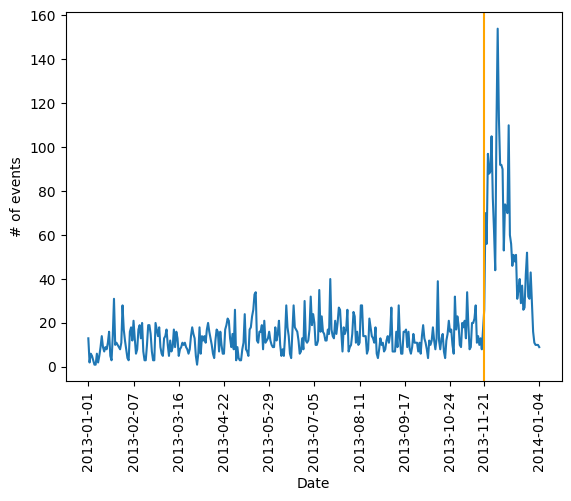

In [6]:
# entire country
alldata = distributed_data.groupby(['event_date','day']).agg({'Number of events': 'sum'}).reset_index()

ticks = []
ticks_pos = []
for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    ticks += [str(alldata['event_date'].to_list()[i*37])[:10]]
    ticks_pos += [i*37]
ticks = ticks[:-1] + ['2013-11-21', '2014-01-04']
ticks_pos = ticks_pos[:-1] + [324, 369]
plt.plot(alldata['day'].to_list(), alldata['Number of events'].to_list())
plt.axvline(x=324, color = 'orange')
plt.xticks(ticks = ticks_pos, labels =ticks, rotation = 90)
plt.xlabel('Date')
plt.ylabel('# of events')
plt.savefig('results/entire_data.png')

# Events in the entire country after 21st November:

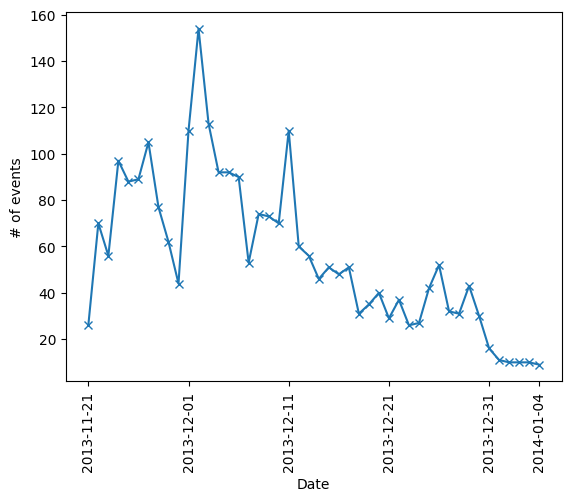

In [7]:
# entire country
alldata = distributed_data.groupby(['event_date','day']).agg({'Number of events': 'sum'}).reset_index()
alldata = alldata.loc[alldata['event_date'] > '2013-11-20']
days = alldata['day'].to_list()[:]
evendate =  alldata['event_date'].to_list()[:]
Nev = alldata['Number of events'].to_list()[:]
ticks = []
ticks_pos = []
for i in [0, 1, 2, 3, 4]:
    ticks += [str(evendate[i*10])[:10]]
    ticks_pos += [days[i*10]]
ticks = ticks + ['2014-01-04']
ticks_pos = ticks_pos + [days[-1]]
plt.plot(days, Nev, marker = 'x')
# plt.axvline(x=324, color = 'orange')
plt.xticks(ticks = ticks_pos, labels =ticks, rotation = 90)
plt.xlabel('Date')
plt.ylabel('# of events')
plt.savefig('results/euro_maidan_ukraine_data.png')

# Events since the 21st of November per oblast:

In [10]:
data_raw = pd.read_csv('data/event_13_cleaned_distributed_with_oblasts_injured.csv')

data_raw

##labeling ukraine as kyiv

data_raw.loc[(data_raw.oblast == 'Ukraine'),'oblast'] = 'Kyiv'


data_raw = data_raw.groupby(['oblast', 'event_date', 'day']).sum().reset_index()


##windowing
#data = data_raw
data = data_raw.loc[data_raw['day'] <= 45]
data = data.loc[data_raw['day'] != 0]
data['day'] = data['day']-1
data = data.loc[data['oblast'] != 'Crimea']

data = data.sort_values(['oblast', 'day'])
data






# Weighted centroid by population?

oblast_coords = {'Cherkasy':[49.4444, 32.0598], 'Chernihiv':[51.4982, 31.2893], 'Chernivtsi':[48.2917, 25.9352],
                 'Crimea':[45.3453, 34.4997], 'Dnipropetrovsk':[48.4647, 35.0462],
                 'Donetsk':[48.0159, 37.8028], 'Ivano-Frankivsk':[48.9226, 24.7111],
                 'Kharkiv':[49.9935, 36.2304], 'Kherson':[46.6354, 32.6169],
                 'Khmelnytskyi':[49.4230, 26.9871], 'Kirovohrad':[48.5079, 32.2623],
                 'Kyiv':[50.0530, 30.7667], 'Luhansk':[48.5740, 39.3078],
                 'Lutsk':[50.7472, 25.3254], 'Lviv':[49.8397, 24.0297],
                 'Mykolaiv':[46.9750, 31.9946], 'Odesa':[46.4846, 30.7326],
                 'Poltava':[49.5883, 34.5514], 'Rivne':[50.6199, 26.2516],
                 'Sumy':[50.9077, 34.7981], 'Ternopil':[49.5535, 25.5948],
                 'Uzhhorod':[48.6208, 22.2879], 'Vinnytsia':[49.2331, 28.4682],
                 'Zaporizhzhia':[47.8388, 35.1396], 'Zhytomyr':[50.2547, 28.6587],
                'Ukraine': [0,0]}


## Defining Distance function
def Wij(i,j,c, d):
    ### i and j are strings oblast names
    if i == j:
        return 1
    if i == 'Ukraine' or j == 'Ukraine':
        dist = 0
    else:
        dist = np.sqrt( (oblast_coords[i][0] - oblast_coords[j][0])**2 + (oblast_coords[i][1] - oblast_coords[j][1])**2)
    return d/(dist + 1)**c

oblasts = data['oblast'].unique()
oblasts


population_oblast_dict = {
                            'Cherkasy':1246166, 
                            'Chernihiv':1047023, 
                            'Chernivtsi':910001,
                            'Crimea':1963770, 
                            'Dnipropetrovsk': 3258705,
                            'Donetsk': 4387702,
                            'Ivano-Frankivsk': 1382721,
                            'Kharkiv': 2720342,
                            'Kherson': 1063803,
                            'Khmelnytskyi': 1296103, 
                            'Kirovohrad': 974724,
                            'Kyiv': 2900920 + 1731673, 
                            'Luhansk': 2263676,
                            'Lutsk': 1042855,  ## Only a city, oblast Volyn city pop 217,197
                            'Lviv': 2535476,
                            'Mykolaiv': 1159634,
                            'Odesa': 2387282,
                            'Poltava': 1440684,
                            'Rivne': 1162049,
                            'Sumy': 1115051,
                            'Ternopil': 1066523,
                            'Uzhhorod': 1259497, ## Only a city, oblast Zakarpattia city pop 115,542
                            'Vinnytsia': 1604270,
                            'Zaporizhzhia':1755663, 
                            'Zhytomyr': 1249225,
                            'Ukraine': 0}
    

#### Oblast Sevastopol 381,685 not present



## get total population
total_pop = 0
for ob in population_oblast_dict.keys():
    total_pop += population_oblast_dict[ob]

population_oblast_dict['Ukraine'] = total_pop

population_oblast_dict

EU_vote = {'Cherkasy':0.5461, 
                            'Chernihiv':0.4481, 
                            'Chernivtsi':0.5672,
                            'Crimea':0, 
                            'Dnipropetrovsk': 0.4472,
                            'Donetsk': 0.3615,
                            'Ivano-Frankivsk': 0.6513,
                            'Kharkiv': 0.3528,
                            'Kherson': 0.4871,
                            'Khmelnytskyi': 0.5626, 
                            'Kirovohrad': 0.5096,
                            'Kyiv': 0.6410, 
                            'Luhansk': 0.3317,
                            'Lutsk': 0.5241,  ## Only a city, oblast Volyn city pop 217,197
                            'Lviv': 0.6992,
                            'Mykolaiv': 0.4597,
                            'Odesa': 0.4178,
                            'Poltava': 0.5455,
                            'Rivne': 0.5546,
                            'Sumy': 0.5541,
                            'Ternopil': 0.6063,
                            'Uzhhorod': 0.622, ## Only a city, oblast Zakarpattia city pop 115,542
                            'Vinnytsia': 0.6732,
                            'Zaporizhzhia':0.3815, 
                            'Zhytomyr': 0.5864,
            }

Ukraine_votes = 0.5470

eu_vote_scaler = {}

for ob in oblasts:
    
    eu_vote_scaler[ob] = EU_vote[ob]/Ukraine_votes

eu_vote_scaler

pop_rat = {}

for ob in oblasts:
    pop_rat[ob] = population_oblast_dict[ob]/population_oblast_dict['Ukraine']
pop_rat





## exclusion:
data = data[~data.oblast.isin(['Chernihiv',
                               'Donetsk',
                               'Dnipropetrovsk',
                               'Kharkiv',
                               'Kherson',
                               'Kirovohrad',
                               'Poltava',
                               'Sumy',
                               'Zhytomyr'
                                ])]

data['Number of civilians arrested'] = data['Number of civilians arrested']+1
data['Number of civilians injured'] = data['Number of civilians injured']+1
data['Number of civilians arrested'] = (data['Number of civilians arrested']  - data['Number of civilians arrested'].min())/(data['Number of civilians arrested'].max()-data['Number of civilians arrested'].min()) + 1
data['Number of civilians injured'] = (data['Number of civilians injured'] - data['Number of civilians injured'].min())/(data['Number of civilians injured'].max()-data['Number of civilians injured'].min()) + 1
data

oblasts = data['oblast'].unique()


days = list(data['day'].unique())
data_array = np.zeros((len(days),len(oblasts)))

for i in range(0, len(oblasts)):
    data_array[:, i] = np.array(data.loc[data['oblast'] == oblasts[i]]['Number of events'])

data_array.shape

(45, 15)

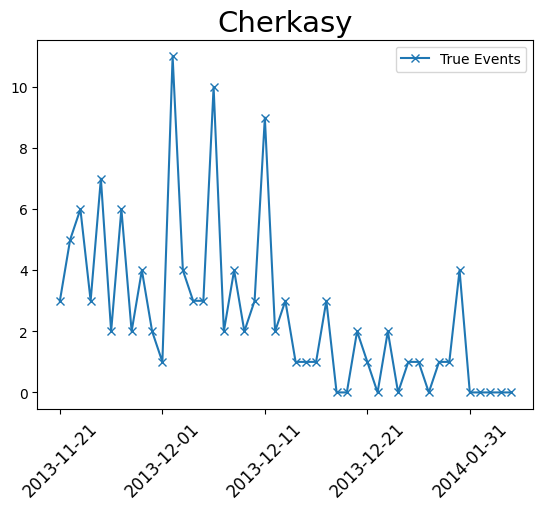

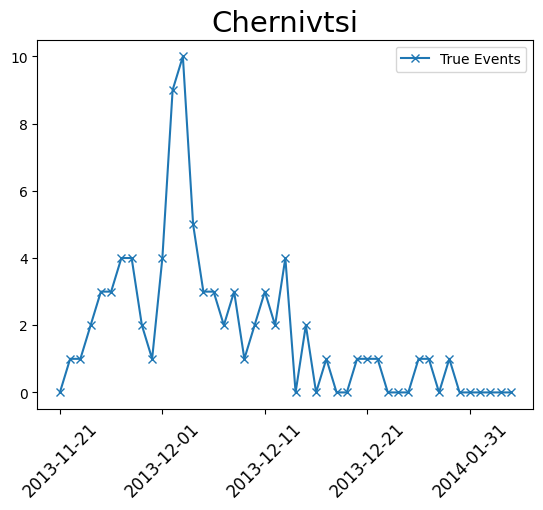

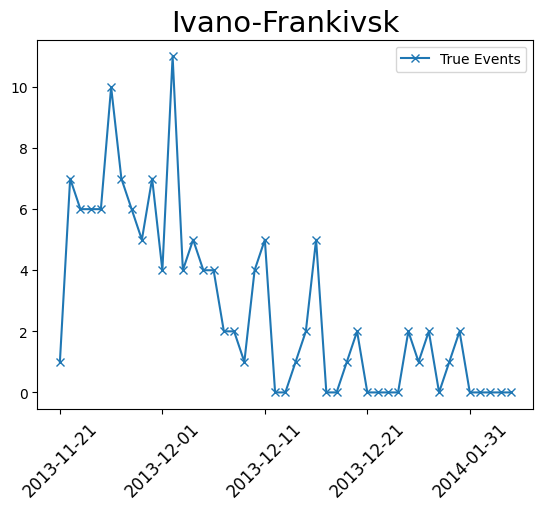

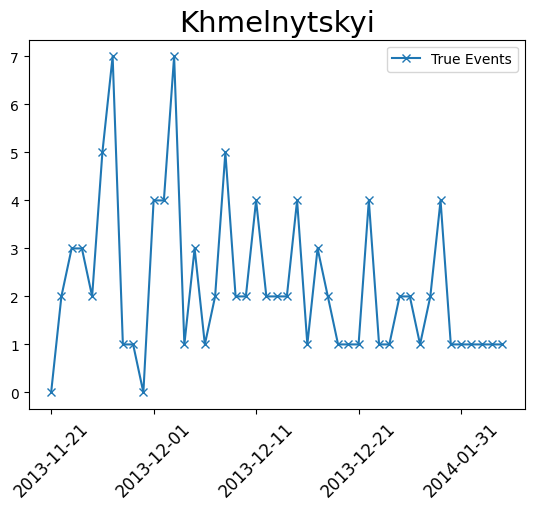

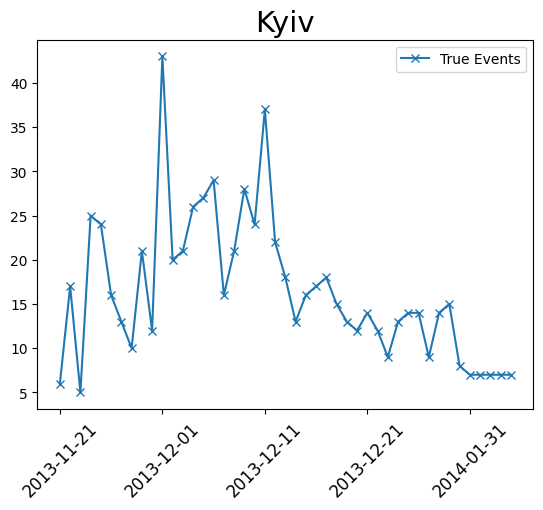

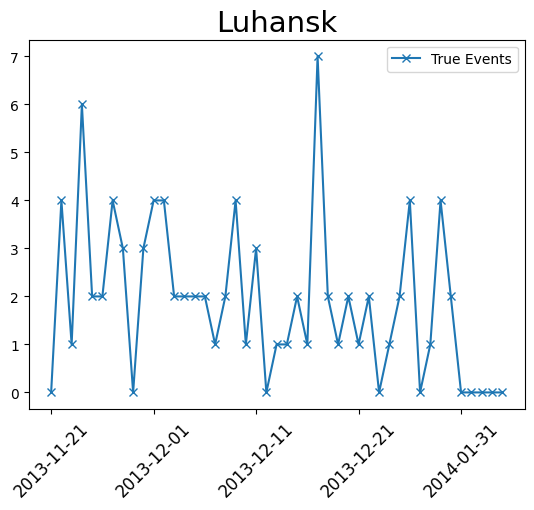

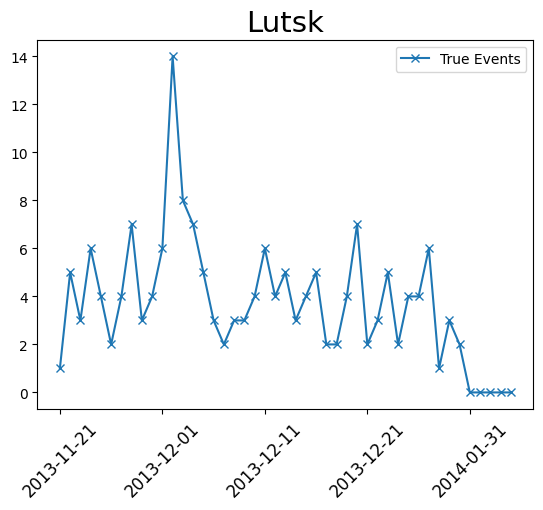

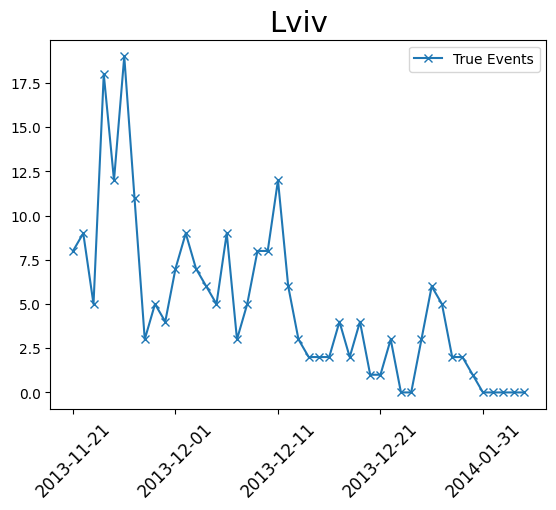

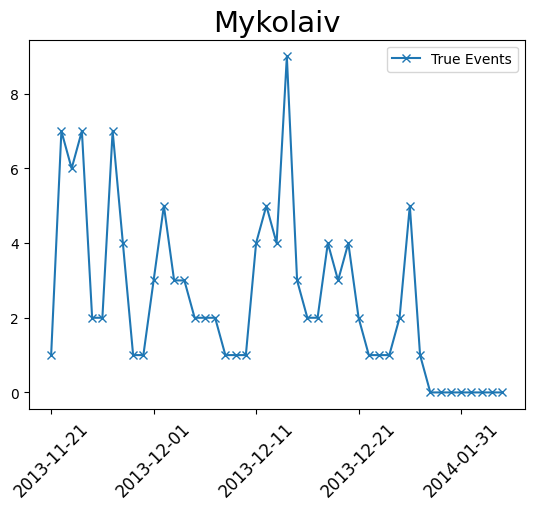

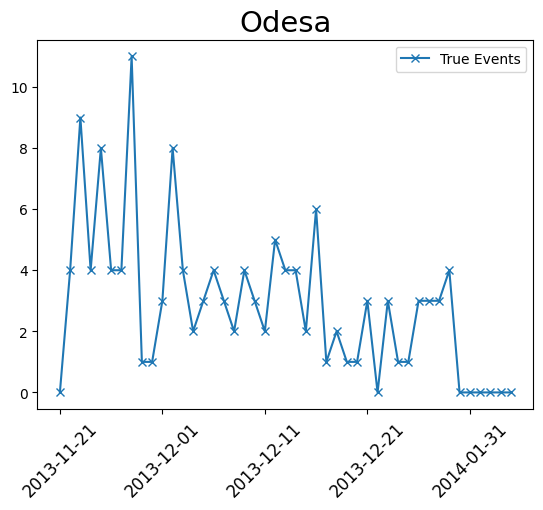

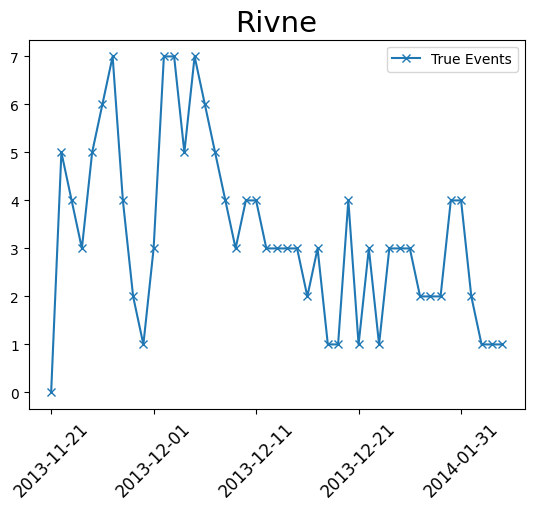

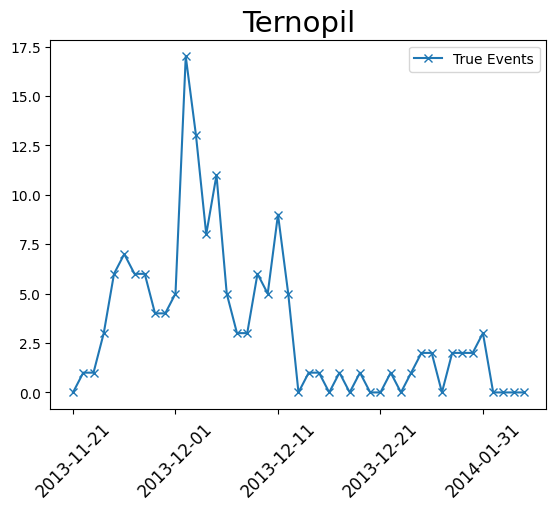

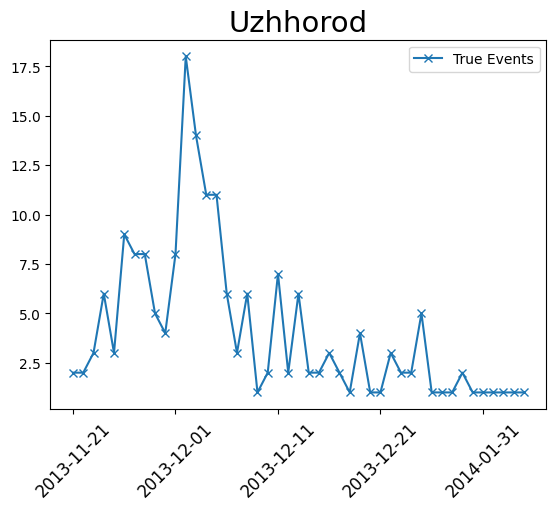

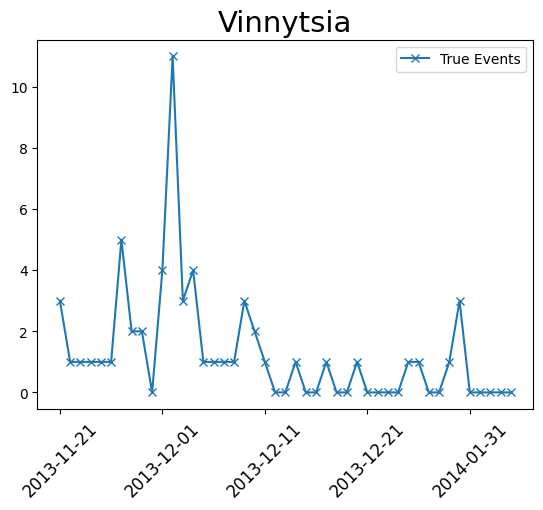

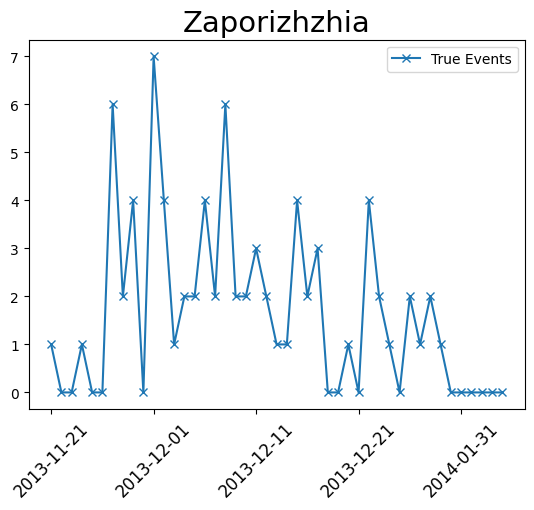

In [14]:
for ob in oblasts:
    oblast_index = np.where(oblasts == ob)[0][0]


    days = list(data['day'].unique())

    plt.plot(days, data_array[:, oblast_index], marker = 'x', label = 'True Events')
    plt.xticks(ticks = [0, 10, 20, 30, 40], labels = ['2013-11-21', '2013-12-01', 
                                                                  '2013-12-11', '2013-12-21', '2014-01-31' 
                                                                    ], rotation = 45, fontsize = 12)
    plt.legend()
    plt.title(ob, fontsize=21)
    
    plt.savefig('viz/all_data_'+ob+'.png')
    plt.show()

In [ ]:
plotting_table['oblast'][10] = ''

# Vizualisation of the spatio temporal spread of true events starting on the 21st of November:

In [ ]:
import geopandas 
import json
import fiona
import numpy as np
import pandas as pd
import shapely
from bokeh.io import show, reset_output, output_notebook
from bokeh.models import (CDSView, ColorBar, ColumnDataSource,
                          CustomJS, CustomJSFilter,
                          GeoJSONDataSource, HoverTool,
                          LinearColorMapper, Slider, Select)
from bokeh.layouts import column, row#, widgetbox
from bokeh.plotting import figure
from bokeh.transform import linear_cmap, log_cmap
from geopy import Point
from shapely.geometry import Polygon
import numpy as np
from bokeh.plotting import figure
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
from matplotlib.widgets import Slider

# %matplotlib notebook


geo_ukraine = geopandas.read_file("data/ukraine.json")
geo_ukraine = geo_ukraine[['id', 'name_1', 'geometry']]


geo_ukraine.head()

### standarizing names:
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Cherkasy", 'Cherkasy')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Chernihiv", 'Chernihiv')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Chernivtsi", 'Chernivtsi')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Crimea", 'Crimea')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Dnipropetrovs'k", 'Dnipropetrovsk')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Donets'k", 'Donetsk')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Kharkiv", 'Kharkiv')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Kherson", 'Kherson')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Khmel'nyts'kyy", 'Khmelnytskyi')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Kiev City", 'Kyiv')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Kiev", 'Kyiv')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Kirovohrad", 'Kirovohrad')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("L'viv", 'Lviv')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Luhans'k", 'Luhansk')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Mykolayiv", 'Mykolaiv')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Odessa", 'Odesa')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Poltava", 'Poltava')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Rivne", 'Rivne')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Sevastopol", 'Sevastopol')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Sumy", 'Sumy')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Ivano-Frankivs'k", 'Ivano-Frankivsk')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Ternopil'", 'Ternopil')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Transcarpathia", 'Uzhhorod')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Vinnytsya", 'Vinnytsia')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Zaporizhzhya", 'Zaporizhzhia')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Zhytomyr", 'Zhytomyr')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Volyn", 'Lutsk')
geo_ukraine = geo_ukraine.rename(columns = {'name_1': 'oblast'})
geo_ukraine['oblast'].unique()

data_table = pd.DataFrame()
days = []
oblast = []
nevent = []
lat = []
long = []
oblast_index = 0
for ob in oblast_coords.keys():
    if ob != "Ukraine":
        if ob in oblasts:
    # for ob in oblasts:
            oblast_index = np.where(oblasts == ob)[0][0]
            nevent = nevent + list(data_array[:,oblast_index])
            oblast = oblast + [ob for i in range(0, len(data_array[:,oblast_index]))]
            days = days + [i for i in range(0, len(data_array[:,oblast_index]))]
            lat = lat + [oblast_coords[ob][0] for i in range(0, len(data_array[:,oblast_index]))]
            long = long + [oblast_coords[ob][1] for i in range(0, len(data_array[:,oblast_index]))]
        else:
            nevent = nevent + [0 for i in range(0,len(data_array[:,oblast_index]))]
            oblast = oblast + [ob for i in range(0, len(data_array[:,oblast_index]))]
            days = days + [i for i in range(0, len(data_array[:,oblast_index]))]
            lat = lat + [oblast_coords[ob][0] for i in range(0, len(data_array[:,oblast_index]))]
            long = long + [oblast_coords[ob][1] for i in range(0, len(data_array[:,oblast_index]))]
data_table['day'] = days
data_table['oblast'] = oblast
data_table['Number of events'] = nevent
data_table['lat'] = lat
data_table['long'] = long
mn = data_table['Number of events'].min()
mx = data_table['Number of events'].max()
data_table['Number of events'] = data_table['Number of events'].apply(lambda x: (x - mn) / (mx - mn))
data_table


for day in range (0, len(data['day'].unique())):

    plotting_table= geo_ukraine.merge(data_table[data_table['day'] == day], how='left', on=['oblast','oblast'])

    event_min = data_table['Number of events'].min()
    event_max = data_table['Number of events'].max()
    event_center = (event_min + event_max)/2
    norm = TwoSlopeNorm(vmin=event_min, vcenter=event_center, vmax=event_max)
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('off')
    plotting_table.boundary.plot(ax = ax, color = 'white')
    plotting_table.plot(ax=ax, 
                        column='Number of events', 
                        cmap='RdPu', 
                        norm = norm, 
                        legend=day%3 == 2, 
                        legend_kwds={'label': "Normalized # of events per oblast ",
                                    'orientation': "vertical",
                                    'shrink': 0.5},
                        figsize = (30, 30))

    ##getting coordinates for labels:
    plotting_table['coords'] = plotting_table['geometry'].apply(lambda x: x.representative_point().coords[:])
    plotting_table['coords'] = [coords[0] for coords in plotting_table['coords']]
    plotting_table['oblast'] = plotting_table['oblast'].apply(lambda x: x[:5])
    plotting_table['oblast'] = plotting_table['oblast'].to_list()[:10] + [''] + plotting_table['oblast'].to_list()[11:]
    plt.title(str(evendate[day])[:10], fontsize=18)
    for idx, row in plotting_table.iterrows():
        plt.annotate(text=row['oblast'], xy=row['coords'],
                                         horizontalalignment='center',
                                        size = 7)
    plt.savefig('viz/sptemp/sptemp'+str(day)+'.png')
